# [Машинное обучение на ФБМФ](https://thetahat.ru/courses/bm-2025-spr)
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  80 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
-----

In [1]:
# Bot check

# HW_ID: bt_ml_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [47]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_absolute_percentage_error, roc_auc_score
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

## Задача 1

Набор данных включает 171 молекулу, предназначенную для функциональных доменов белка CRY1, ответственного за формирование циркадного ритма. 56 молекул токсичны, а остальные нетоксичны.

Полученные данные представляют собой полный набор из 1203 молекулярных дескрипторов.

Данное домашнее задание имеет свободную форму, то есть вашей задачей будет для каждого класса моделей получить лучший результат и после выбрать наилучшую модель. Метрика для задачи - `from sklearn.metrics import f1_score`. Работа будет оцениваться по следующим ключевым пунктам:


1.   Предвартельный анализ данных
2.   Предобработка данных
      -   Обработка пропусков
      -   Обработка выбросов

3.   Реализация моделей
      -  Дерево
      -  Логистическая регрессия
      -  KNN



### 1. Предварительный анализ данных

В этом разделе ожидается, что вы посмотрите на распределение признаков и классов, изучите их связь, проанализируете признаки на наличие в них пропусков или выбросов.

In [5]:
df = pd.read_csv('/content/hw5_data_bio.csv')
df

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


In [8]:
print(df.isnull().sum()[df.isnull().sum() > 0]) #Видим, что нулевых значений нет, датасет предобработан

Series([], dtype: int64)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.6+ MB


In [11]:
df.describe()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,-0.031244,0.315789,-0.001001,-0.061501,0.994152,0.677770,-0.025418,-0.053289,1.569251,0.003226,...,23.229975,8.134013,13.490291,0.202529,1.235093,0.011316,1.467836,0.004820,-0.085088,0.061702
std,0.063559,0.762918,0.063928,0.072891,1.108773,1.647322,0.078645,0.109463,2.497362,0.074076,...,6.440623,4.436831,6.229089,0.024356,0.137024,0.005482,1.013361,0.044475,0.029273,0.241896
min,-0.311500,0.000000,-0.184600,-0.348500,0.000000,0.000000,-0.211900,-0.472900,-0.708700,-0.198700,...,0.000000,0.000000,0.000000,0.163600,0.811500,0.001400,0.000000,0.000000,-0.202700,0.000000
25%,-0.066700,0.000000,-0.036000,-0.099550,0.000000,0.000000,-0.066550,-0.118050,0.000000,-0.052350,...,19.249600,5.164700,8.819950,0.182450,1.149750,0.007550,1.000000,0.000000,-0.099500,0.000000
50%,-0.032500,0.000000,-0.002000,-0.059400,1.000000,0.000000,-0.037200,-0.042400,0.000000,-0.001600,...,23.151200,7.848200,13.342700,0.199600,1.238800,0.010700,1.000000,0.000000,-0.082400,0.000000
75%,0.004850,0.000000,0.029000,-0.017100,2.000000,0.000000,0.002650,0.014300,4.897450,0.056550,...,26.958050,10.683950,19.319450,0.219700,1.325350,0.013900,2.000000,0.000000,-0.066350,0.000000
max,0.141100,4.000000,0.218100,0.129000,6.000000,8.141400,0.249500,0.212200,7.740800,0.168400,...,41.380000,20.805400,27.879600,0.272100,1.548800,0.034600,5.000000,0.429200,-0.007300,2.636100


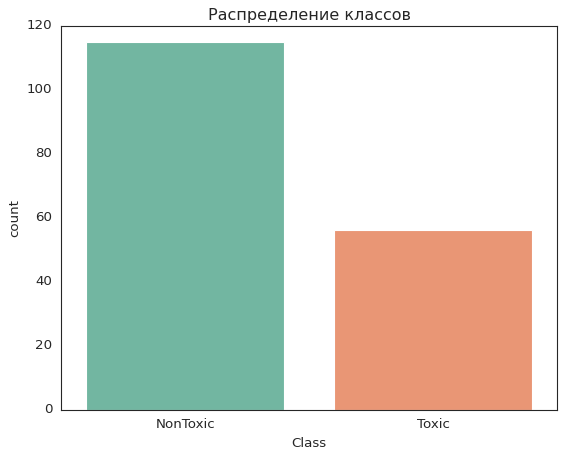

In [18]:
sns.countplot(x='Class', data=df, palette = "Set2")
plt.title('Распределение классов')
plt.show()

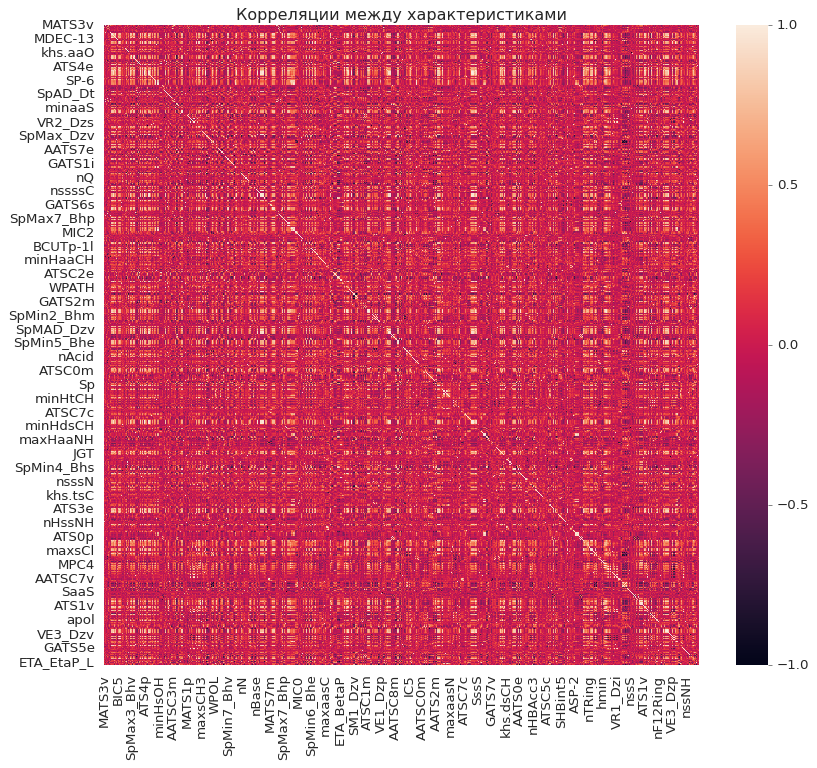

In [24]:
df_feature = df.drop(['Class'], axis = 1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_feature.corr()).set(title="Корреляции между характеристиками");

In [41]:
# Визуализировать графиками больше 1000 признаков будет неинформативно, поэтому воспользуемся IQR
def iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)] #выбросы
    return outliers

outliers_df = pd.DataFrame(columns=['Признак', 'Количество выбросов'])

for column in df_feature.columns:
    outliers = iqr(df_feature[column])
    if not outliers.empty:
        temp_df = pd.DataFrame({
            'Признак': [column],
            'Количество выбросов': [len(outliers)]})
        outliers_df = pd.concat([outliers_df, temp_df], ignore_index=True)
outliers_df

,Признак,Количество выбросов
0,MATS3v,5
1,nHBint10,32
2,MATS3s,9
3,MATS3p,5
4,nHBDon_Lipinski,1
...,...,...
1095,ETA_EtaP_B,5
1096,nT5Ring,3
1097,SHdNH,2
1098,ETA_dEpsilon_C,7


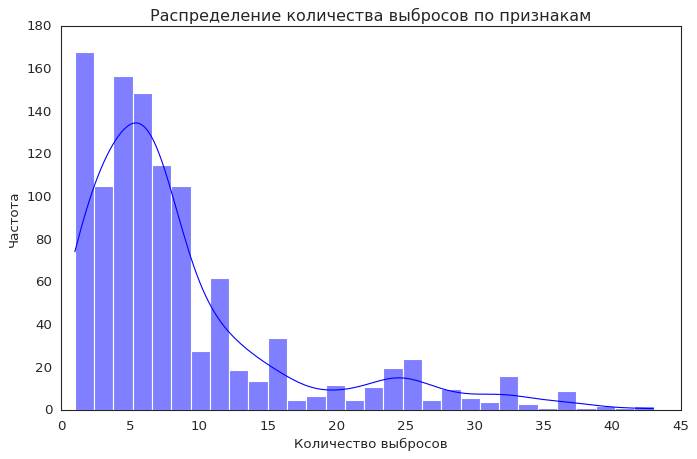

In [38]:
# Гистограмма для количества выбросов
plt.figure(figsize=(10, 6))
sns.histplot(outliers_df['Количество выбросов'], bins=30, kde=True)
plt.title('Распределение количества выбросов по признакам')
plt.xlabel('Количество выбросов')
plt.ylabel('Частота')
plt.show()

**Выводы:**

### 2. Предобработка данных

В этом разделе ожидается, что вы обработаете пропуски (если они есть) с помощью линейной регрессии, а выбросы (если они есть) обработайте способом на ваше усмотрение. Для оценки качества обработки пропусков используйте метрику MAPE.

In [43]:
# Как мы уже убедились - пропусков в данных нет, поэтому займёмся выбросами:
outliers_dict = {}
for column in df.select_dtypes(include=['number']).columns:
    outliers = iqr(df[column])
    if not outliers.empty:
        outliers_dict[column] = outliers
df_no_outliers = df.copy()
for column in outliers_dict:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

df_no_outliers.shape
# Как видим просто удалить нельзя, потому что тогда не останется данных

(0, 1204)

In [44]:
# Возьмём вместо выбросов медиану
df_median = df.copy()
for column in outliers_dict:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df_median.loc[(df_median[column] < lower_bound) | (df_median[column] > upper_bound), column] = median

df_median.shape

(171, 1204)

### 3. Обучение моделей

In [45]:
#Для предварительного обучения выберите первые  N <= 100000 строк, обучение лучшей модели можете произвести на всем датасете

#для теста используйте 30% выборки, размер валидационной выборки выберите на ваше усмотрение
X = df_median.drop(columns=['Class'])
y = df_median['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### DecisionTreeClassifier

In [50]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
f1_tree = f1_score(y_test, y_pred_tree, pos_label='Toxic')
f1_tree

0.17142857142857143

**Выводы:** Получили очень низкие значения f1-score, Что не хорошо

#### LogisticRegression

In [52]:
logreg_model = LogisticRegression(max_iter=2000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label='Toxic')
f1_logreg

0.26666666666666666

**Выводы:** Получили очень низкие значения f1-score, но наилучший из 3х вариантов моделей

#### KNeighborsClassifier

In [54]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn, pos_label='Toxic')
f1_knn

0.07142857142857142

**Выводы:** Получили очень-очень низкие значения f1-score, очень плохо

### 4. Анализ полученных результатов и выводы по задаче

**Выводы:** Лучшая модель по f1-score логистическая регрессия, но стоит доработать - например выбрать только несколько самых важных признаков.


## Задача 2

В этой задаче вам нужно будет реализовать оптимальный подсчет метрики **ROC-AUC**. Вспомним, что **ROC** &mdash; кривая в координатах **True Positive Rate (TPR)** и **False Positive Rate (FPR)**, а **ROC-AUC** &mdash; площадь под этой кривой.

**TPR (True Positive Rate, полнота)** показывает какую долю объектов положительного класса модель классифицировала правильно:

$$TPR = \dfrac{TP}{TP + FN}$$


**FPR (False Positive Rate)** показывает, какую долю из объектов негативного класса модель предсказала неверно:

$$FPR = \dfrac{FP}{FP + TN}$$

1. Предложите алгоритм расчета метрики за $\mathcal{O} \left(n \log n\right)$, где $n$ &mdash; размер выборки.  
    *Подсказка.* Подумайте сколько всего различных пар $\left(FPR, TPR\right)$ существует.

    <...>

2. Реализуйте предложенный алгоритм.

In [ ]:
def roc_auc(y_true, y_score):
    '''
    Вычисляет ROC-AUC за O(n log(n))
    :param y_true: истинные бинарные метки
    :param y_score: предсказанная вероятность положительного класса
    '''
    <...>

    return auc


Для самопроверки:

In [ ]:
assert roc_auc([1, 0, 1, 1, 1], [0, 0.3, 0.2, 0, 0.5]) == 0.25